In [4]:
# Librerias
import quandl
import datetime
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />

# Proyecto de Aplicación Profesional

## Optimización De Programas de Inversión para Intermediarios Financieros



### Integrantes:

### - Jazmín Calderón
### - Diana Chávez
### - Juan Antonio Flores




In [5]:
#Lista de nombres de los 36 ETF's

lista = ['1-3-Year-Treasury-Bond',
         '20-Year-Treasury-Bond',
         '7-10-Year-Treasury-Bond',
         'Core-MSCI-EAFE',
         'Core-MSCI-Emerging-Markets',
         'Core-MSCI-Total-International-Stock',
         'Core-SP-500',
         'Core-SP-Mid-Cap', 
         'Core-SP-Total-US-Stock-Market',
         'Core-US-Aggregate-Bond', #beta cero
         'Edge-MSCI-Min-Vol-EAFE', 
         'Edge-MSCI-Min-Vol-USA',
         'Edge-MSCI-USA-Quality-Factor',
         'Floating-Rate-Bond',
         'JP-Morgan-USD-Emerging-Markets-Bond', #el ultimo que hice
         'MSCI-ACWI',
         'MSCI-EAFE',
         'MSCI-Emerging-Markets',
         'MSCI-Japan',
         'Nasdaq-Biotechnology',
         'Russell-1000',
         'Russell-1000-Growth',
         'Russell-1000-Value',
         'Russell-2000',
         'SP-500-Growth',
         'SP-500-Value']

# Todos tienen en común:

#'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-
# +
# NOMBRE ETF EN LISTA
# +
# -ETF_fund.csv',


## Importar Datos

## ETF'S

In [7]:
#ETF = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-1-3-Year-Treasury-Bond-ETF_fund.csv',
 #                 skiprows = [0,1,2,3], delim_whitespace=False)
desv=[]
rend = []
for i in range(26):
    a='https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-'
    b='-ETF_fund.csv'
    dd=[]
    ETF = pd.read_csv(a+lista[i]+b,skiprows = [0,1,2,3], delim_whitespace=False)
    
    #Limpieza y acondicionamiento del DataFrame
    ETF['Rendimientos mensual'] = ETF['Rendimientos mensual'].replace('--',0)
    ETF['Rendimientos mensual'] = ETF['Rendimientos mensual'].astype(float)
    
    #Obtención de rendimiento promedio mensual y desviación estándar mensual
    rend_men = ETF['Rendimientos mensual']
    
    desv.append(np.std(rend_men))
    rend.append(np.mean(rend_men))
    

    
    
    
      
#print(desv,rend)

In [8]:
n_etf=[]
for i in range(26):
    n_etf.append(1+i)
#print(n_etf)

In [27]:

tablap = pd.DataFrame(index=lista,columns=['Rend %','Riesgo'])
tablap.index.name = "ETF"
tablap['Rend %'] = rend
tablap['Riesgo'] = desv

tablap

,Rend %,Riesgo
ETF,,
1-3-Year-Treasury-Bond,0.159050,0.370861
20-Year-Treasury-Bond,0.558950,3.641024
7-10-Year-Treasury-Bond,0.381450,1.820015
Core-MSCI-EAFE,0.590519,3.413030
Core-MSCI-Emerging-Markets,0.351169,4.136979
Core-MSCI-Total-International-Stock,0.502338,3.400637
Core-SP-500,0.534469,4.162956
Core-SP-Mid-Cap,0.842965,4.843601
Core-SP-Total-US-Stock-Market,0.752637,3.976045


### Mapa de calor

In [67]:
uno=rend[0:6]
dos=rend[6:12]
tres=rend[12:18]
cuatro=rend[18:24]
cinco=rend[24:30]
seis=rend[30:36]

In [68]:
import plotly.plotly as py
import plotly.figure_factory as ff
import numpy as np
import plotly 

In [69]:
plotly.tools.set_credentials_file(username='jazerape', api_key='eX7PWHChSnlXoCQOaddE')

In [82]:
z = [uno,dos,tres,cuatro,cinco,seis] 

In [76]:
unot=lista[0:6]
dost=lista[6:12]
trest=lista[12:18]
cuatrot=lista[18:24]
cincot=lista[24:30]
seist=lista[30:36]

In [80]:
z_text = [unot,dost,trest,cuatrot,cincot,seist] 


In [83]:
#z=rend
#z = np.random.randn(20, 20)
z_text = np.around(z, decimals=2) # Only show rounded value (full value on hover)

#z

In [84]:
colorscale = [[0, '#66475e'], [1, '#ecbfe0']]
fig = ff.create_annotated_heatmap(z, annotation_text=z_text, colorscale=colorscale, hoverinfo='z')



In [74]:
# Make text size smaller
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 8
    

In [75]:
py.iplot(fig, filename='annotated_heatmap_numpy')

### Medidas de Atribución al desempeño

In [10]:
usd_rate = [0.0241,0.0241,0.0239,0.0240,0.0241,0.0241,0.0243,0.0243,0.0242,0.0242,0.0241,
           0.0241,0.0241,0.0239,0.0240,0.0241,0.0241,0.0243,0.0243,0.0242,0.0242,0.0241,
           0.0241,0.0241,0.0239,0.0240]#,0.0241,0.0241,0.0243,0.0243,0.0242,0.0242,0.0241,
           #0.0241,0.0241,0.0239] #tasa libre de riesgo EEUU #0.0241
sharpe_ETF=[]
for i in range(26):
    #sharpe[i] = (rend[i]-usd_rate[i])/desv[i]
    sharpe_ETF.append((rend[i]-usd_rate[i])/desv[i])
#print(sharpe_ETF)

In [17]:
# Treynor
beta = [-0.02,-0.09,-0.09,0.77,0.80,0.79,1.00,1.18,1.03,0.01,0.54,0.75,0.98,0.03,0.17,0.90,0.75,0.81,0.73,1.48,1.01,1.07,
        0.95,1.26,1.02,0.98]

#0.01 en realidad es cero

treynor_ETF=[]
for i in range(26):
    #sharpe[i] = (rend[i]-usd_rate[i])/desv[i]
    treynor_ETF.append((rend[i]-usd_rate[i])/beta[i])
#print(treynor_ETF)




In [18]:
tabla = pd.DataFrame(index=lista,columns=['Rend %','Riesgo','Sharpe','Treynor %'])
tabla.index.name = "ETF"
tabla['Rend %'] = rend
tabla['Riesgo'] = desv
tabla['Sharpe'] = sharpe_ETF
tabla['Treynor %'] = treynor_ETF
tabla

,Rend %,Riesgo,Sharpe,Treynor %
ETF,,,,
1-3-Year-Treasury-Bond,0.159050,0.370861,0.363883,-6.747500
20-Year-Treasury-Bond,0.558950,3.641024,0.146895,-5.942778
7-10-Year-Treasury-Bond,0.381450,1.820015,0.196454,-3.972778
Core-MSCI-EAFE,0.590519,3.413030,0.165987,0.735740
Core-MSCI-Emerging-Markets,0.351169,4.136979,0.079060,0.408836
Core-MSCI-Total-International-Stock,0.502338,3.400637,0.140632,0.605364
Core-SP-500,0.534469,4.162956,0.122550,0.510169
Core-SP-Mid-Cap,0.842965,4.843601,0.169020,0.693784
Core-SP-Total-US-Stock-Market,0.752637,3.976045,0.183207,0.707221


In [36]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(data_url)
print(gapminder.head(3))

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710


In [23]:
df1 = gapminder[['continent', 'year','lifeExp']]
print(df1.head())

  continent  year  lifeExp
0      Asia  1952   28.801
1      Asia  1957   30.332
2      Asia  1962   31.997
3      Asia  1967   34.020
4      Asia  1972   36.088


In [40]:
heatmap1_data = pd.pivot_table(tablap, values=None, 
                     index=['ETF'], 
                     columns=None) #country,year,pop,continent,lifeExp,gdpPercap

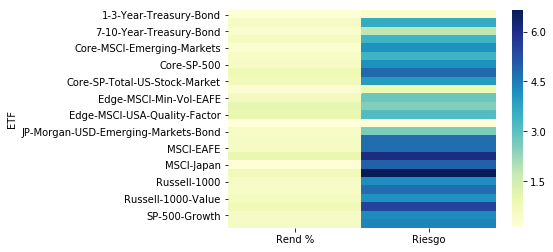

In [41]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")


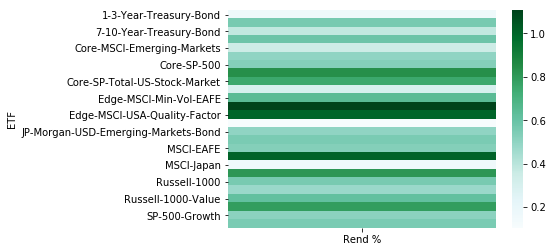

In [44]:
df2 = tablap[['Rend %']]
heatmap2_data = pd.pivot_table(df2,values=None, index=['ETF'], columns=None)
heatmap2_data.head(n=5)
sns.heatmap(heatmap2_data, cmap="BuGn")

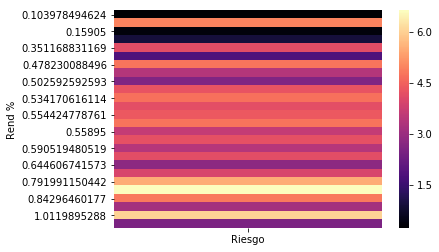

In [54]:
df3 = tablap[['Rend %','Riesgo']]
heatmap3_data = pd.pivot_table(df3,values=None, index=['Rend %'], columns=None)
heatmap3_data.head(n=5)
sns.heatmap(heatmap3_data, cmap="magma")

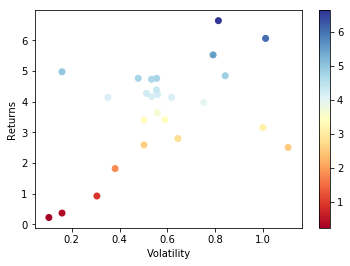

In [59]:
plt.scatter(tablap['Rend %'],tablap['Riesgo'],c=tablap['Riesgo'],cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
